# SVM - Women Risk Predictor

In [ ]:
# Import necessary libraries for data manipulation, visualization, and modeling
# pandas/numpy: Data handling and numerical operations
# matplotlib/seaborn: Data visualization
# sklearn: Machine learning tools (SVM, metrics, cross-validation)
# joblib: Model serialization for saving trained models

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
import joblib
import os

In [ ]:
# Load the preprocessed dataset
# This file contains cleaned and feature-engineered data ready for modeling
fp = pd.read_csv("../data/women_risk_processed.csv")

In [ ]:
# Preview the first few rows of the dataset
fp.head()

,Timestamp,1. What is your age group?,2. What is your occupation?,3. At what time of day did the incident occur?,4. Where did the incident occur?,5. How crowded was the location at the time of the incident?,6. What was the lighting condition in the area?,7. Was any form of security present at the location?,8. Were you familiar with the area where the incident occurred?,9. What type of harassment did you experience?,10. How often have you experienced harassment in similar situations?,11. How safe did you feel during the incident?,"12. Overall, how would you rate the risk level of harassment in that situation?"
0,-1.717054,-1.101957,0.768289,0.050825,0.447315,1.626236,-0.035267,0.638877,0.438805,-0.086657,0.886103,-0.205660,2.179449
1,-1.686931,-1.101957,0.768289,0.050825,-0.369212,-1.378055,0.775880,0.638877,1.130072,-0.086657,-1.843410,2.328366,1.300022
2,-1.656807,-1.101957,0.768289,1.512033,-1.185740,0.875163,1.587028,0.638877,-0.943731,-0.917117,0.886103,1.483691,1.300022
3,-1.626683,-1.101957,0.768289,1.512033,-0.369212,-1.378055,0.775880,0.638877,0.438805,-0.086657,-0.023735,1.483691,-1.338258
4,-1.596559,-0.233977,0.038097,-0.679780,0.447315,0.124090,-0.035267,1.557262,-0.252463,1.574264,0.886103,1.483691,-1.338258


In [ ]:
# Check the dimensions of the dataset (rows, columns)
fp.shape

(115, 13)

In [ ]:
# Prepare features (X) and target variable (y)
# Target: Overall risk level rating column
target_col = '12. Overall, how would you rate the risk level of harassment in that situation?'
X = fp.drop(target_col, axis=1)  # All features except target
y = fp[target_col]  # Target variable

# Convert to binary classification: 1 if above median (high risk), 0 otherwise (low risk)
y = (y > y.median()).astype(int)

In [ ]:
# Split data into training (80%) and testing (20%) sets
# stratify=y ensures balanced class distribution in both sets
# random_state=42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Initialize Support Vector Machine (SVM) Classifier
# probability=True: Enable probability estimates for ROC-AUC calculation
# SVM finds the optimal hyperplane that maximizes the margin between classes
model = SVC(probability=True, random_state=42)

In [ ]:
# Train the SVM model on the training data
# The model finds the optimal decision boundary between classes
model.fit(X_train, y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",True
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [ ]:
# Make predictions on the test set
# y_pred: Binary predictions (0 or 1)
# y_pred_proba: Probability of positive class (for ROC-AUC calculation)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [ ]:
# Calculate Accuracy: Proportion of correct predictions
accuracy_score(y_test, y_pred)

0.8695652173913043

In [ ]:
# Calculate Precision: Proportion of positive predictions that are correct
# High precision = fewer false positives
precision_score(y_test, y_pred)

1.0

In [ ]:
# Calculate Recall (Sensitivity): Proportion of actual positives correctly identified
# High recall = fewer false negatives
recall_score(y_test, y_pred)

0.25

In [ ]:
# Calculate F1-Score: Harmonic mean of precision and recall
# Balances both metrics (useful for imbalanced datasets)
f1_score(y_test, y_pred)

0.4

In [ ]:
# Calculate ROC-AUC Score: Model's ability to distinguish between classes
# Score of 1.0 = perfect classifier, 0.5 = random classifier
roc_auc_score(y_test, y_pred_proba)

1.0

In [ ]:
# Display comprehensive classification report with all metrics
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.86      1.00      0.93        19\n           1       1.00      0.25      0.40         4\n\n    accuracy                           0.87        23\n   macro avg       0.93      0.62      0.66        23\nweighted avg       0.89      0.87      0.84        23\n'

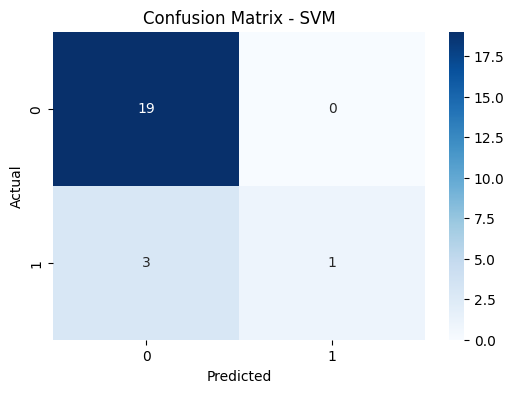

In [ ]:
# Visualize Confusion Matrix
# Shows the distribution of true positives, true negatives, false positives, and false negatives
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

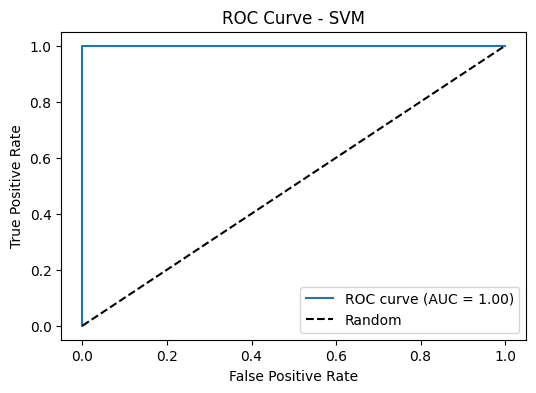

In [ ]:
# Plot ROC Curve (Receiver Operating Characteristic)
# Visualizes the trade-off between true positive rate and false positive rate
# Higher AUC (Area Under Curve) indicates better model performance
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend()
plt.show()

## Hyperparameter Tuning

In [ ]:
# Define hyperparameter grid for tuning
# C: Regularization parameter (smaller values = stronger regularization)
# kernel: Type of kernel function ('linear' for linear boundary, 'rbf' for non-linear)
# gamma: Kernel coefficient ('scale' = 1/(n_features*X.var()), 'auto' = 1/n_features)
param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ['linear', 'rbf'],
    "gamma": ['scale', 'auto']
}

In [ ]:
# Initialize GridSearchCV for hyperparameter tuning
# cv=5: 5-fold cross-validation
# scoring='accuracy': Optimize for accuracy
# n_jobs=-1: Use all available CPU cores for parallel processing
grid = GridSearchCV(SVC(probability=True, random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
# Train the model with all hyperparameter combinations using cross-validation
# This will find the best combination of parameters
grid.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",SVC(probabili...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'C': [0.1, 1, ...], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score

In [ ]:
# Display the best hyperparameters and their cross-validation accuracy
print("Best parameters:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)

Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV accuracy: 0.8812865497076023


In [ ]:
# Extract the best model from GridSearchCV
best_model = grid.best_estimator_

In [ ]:
# Make predictions using the tuned model
y_pred_tuned = best_model.predict(X_test)
y_pred_proba_tuned = best_model.predict_proba(X_test)[:, 1]

In [ ]:
# Calculate accuracy of the tuned model
accuracy_score(y_test, y_pred_tuned)

0.9130434782608695

In [ ]:
# Display classification report for the tuned model
classification_report(y_test, y_pred_tuned)

'              precision    recall  f1-score   support\n\n           0       0.90      1.00      0.95        19\n           1       1.00      0.50      0.67         4\n\n    accuracy                           0.91        23\n   macro avg       0.95      0.75      0.81        23\nweighted avg       0.92      0.91      0.90        23\n'

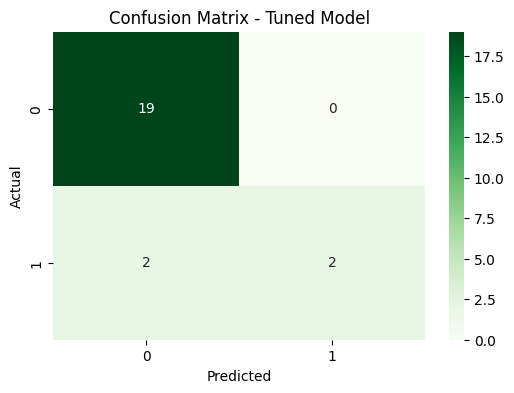

In [ ]:
# Visualize confusion matrix for the tuned model
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Tuned Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

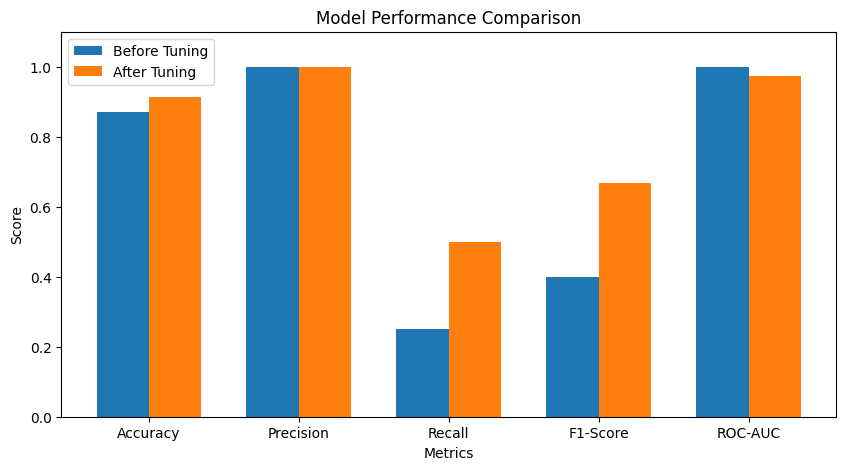

In [ ]:
# Compare model performance before and after hyperparameter tuning
# Visualize all metrics side by side to see improvement
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
before = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), 
          recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred_proba)]
after = [accuracy_score(y_test, y_pred_tuned), precision_score(y_test, y_pred_tuned), 
         recall_score(y_test, y_pred_tuned), f1_score(y_test, y_pred_tuned), roc_auc_score(y_test, y_pred_proba_tuned)]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 5))
plt.bar(x - width/2, before, width, label='Before Tuning')
plt.bar(x + width/2, after, width, label='After Tuning')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics)
plt.legend()
plt.ylim([0, 1.1])
plt.show()

## Save Model

In [ ]:
# Save the trained model to disk for later use
# Creates the models directory if it doesn't exist
# Saves the best model as a pickle file
os.makedirs('../models', exist_ok=True)
joblib.dump(best_model, '../models/svm_model.pkl')
print("Model saved!")

Model saved!
